# Continuous Motion using Gaussian Sampling

[125 125]


[array([125, 125]),
 array([125, 124]),
 array([126, 126]),
 array([125, 126]),
 array([124, 127]),
 array([127, 127]),
 array([128, 128]),
 array([126, 125]),
 array([127, 126]),
 array([125, 123]),
 array([124, 128]),
 array([127, 129]),
 array([126, 128]),
 array([125, 122]),
 array([124, 125]),
 array([126, 130]),
 array([126, 121]),
 array([124, 121]),
 array([126, 131]),
 array([128, 125]),
 array([123, 124]),
 array([125, 131]),
 array([122, 125]),
 array([123, 121]),
 array([121, 124]),
 array([121, 123]),
 array([127, 130]),
 array([125, 120]),
 array([126, 132]),
 array([126, 133]),
 array([120, 124]),
 array([122, 120]),
 array([127, 130]),
 array([123, 129]),
 array([129, 128]),
 array([120, 122]),
 array([125, 131]),
 array([119, 122]),
 array([126, 122]),
 array([118, 121]),
 array([129, 124]),
 array([122, 119]),
 array([128, 131]),
 array([121, 118]),
 array([120, 125]),
 array([122, 128]),
 array([121, 128]),
 array([128, 131]),
 array([122, 130]),
 array([121, 130]),


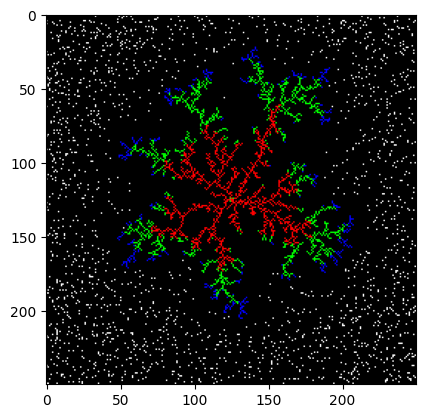

In [10]:
import numpy as np
import random
from PIL import Image
from matplotlib import pyplot as plt

#TODO This first section will look identical to the initialization of 2d motion

def cont_motion(size, points, iterations):

    #This creates an array of size size by size. 
    #Each element in the array is a list that holds 3 values = [Red,Green,Blue]
    data = np.zeros((size,size,3),dtype=np.uint8)

    #This creates an array of size size+1 by size+1.
    #The +1 makes it so that if a fractal grows to the edge, it will not cause an out-of-bounds error
    #Each element in the array is a boolean that is true if the spot kills. (dtype=bool)
    danger_zone=np.zeros((size+1,size+1,1),dtype=bool)

    #create a particle list and a dead set
    particles = []
    dead_set = []

    #Create a random set of live particles
    x=np.random.randint(0,size-1,size=points)
    y=np.random.randint(0,size-1,size=points)

    #Make the random set of live particles visible, create a coord tuple, and append that to the particles list
    for p in range(points):
        data[x[p]][y[p]] = [255,255,255]
        coord =  (x[p],y[p])
        particles.append(coord)

    #Create a center dead point, make it red, and set it as a killer space and in the dead set.
    center = size//2
    data[center][center] = [255,0,0]
    danger_zone[center][center] = True
    cent = (center,center)
    dead_set.append((np.array(cent)))

    #look at the points around the center and set them as a killer space.

    #left and right + green for visibility
    danger_zone[center-1][center]=True
    danger_zone[center+1][center]=True
    data[center-1][center]=[0,255,0]
    data[center+1][center]=[0,255,0]

    #Up and Down + green for visibility
    danger_zone[center][center-1]=True
    danger_zone[center][center+1]=True
    data[center][center-1]=[0,255,0]
    data[center][center+1]=[0,255,0]

    #diagonals + green for visibility
    danger_zone[center-1][center-1]=True
    danger_zone[center+1][center+1]=True
    danger_zone[center-1][center+1]=True
    danger_zone[center+1][center-1]=True
    data[center-1][center-1]=[0,255,0]
    data[center+1][center+1]=[0,255,0]
    data[center-1][center+1]=[0,255,0]
    data[center+1][center-1]=[0,255,0]

    #Debugging code
    #image = Image.fromarray(data)
    #image.show() 

    #Main motion code:

    for frame in range(iterations):
        #The number of living particles at start of the iteration. (Particles get popped as they freeze)
        live_points_count = len(particles)

        #Create a set of 2d coordinates that determine how the particles randomly walk.

        mean = (0,0) #bell curve is centered at (0,0)
        cov = [[1, 0], [0, 1]]
        rng = np.random.default_rng()
        rand_motion = rng.multivariate_normal(mean, cov, size=live_points_count)

        #Map together the particles and the random movement per particle.
        movement = list(zip(particles,rand_motion))

        for index, pixel in enumerate(movement):

            #set previous point location to black
            x=pixel[0][0]
            y=pixel[0][1]
            data[x][y] = [0,0,0]

            #make the movement
            #check this code (give credit). The % creates a torus condition
            x = (round(pixel[1][0]) + pixel[0][0]) % size 
            y = (round(pixel[1][1]) + pixel[0][1]) % size
            data[x][y] = [255,255,255]
            particles[index] = (x,y)

            #Check if the particle will freeze
            if(danger_zone[x][y] == True):
                #This is just for color
                if(live_points_count > 3*(points//4)): data[x][y] = [255,0,0]
                elif(live_points_count > 2*(points//4)): data[x][y] = [0,255,0]
                elif(live_points_count > points//4): data[x][y] = [0,0,255]
                else: data[x][y] = [255,0,255]

                #remove from related lists and add to dead set
                particles.pop(index) # WARNING probably O(N)
                movement.pop(index)
                dead_coord = (x,y)
                dead_set.append(np.array(dead_coord))





                danger_zone[x-1][y]=True
                danger_zone[x+1][y]=True
                danger_zone[x][y-1]=True
                danger_zone[x][y+1]=True
                danger_zone[x-1][y-1]=True
                danger_zone[x+1][y+1]=True
                danger_zone[x-1][y+1]=True
                danger_zone[x+1][y-1]=True



            








    #Debugging code
    #image = Image.fromarray(data)
    #image.show()
    #plt.imshow(data)

    #print(dead_set[0])

    return dead_set
     

cont_motion(250,5000,5000)

# Continuous Fractal Density

In [14]:

#parameters
size = 250
points = 10000
iterations = 5000
pts_1 =[] 

runs = 20
for x in range(runs):
    print("Run " + str(x+1))
    pts_1+=cont_motion(size,points,iterations)


data_dist = np.zeros((250, 250))
for x, y in pts_1:
    data_dist[int(x), int(y)] += 1/runs

plt.imshow(data_dist)

Run 1


KeyboardInterrupt: 